# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 622
['new norfolk', 'metlili chaamba', 'codrington', 'bethel', 'arraial do cabo', 'hawaiian paradise park', 'vilyuchinsk', 'grand falls-windsor', 'invercargill', 'kerikeri', 'georgetown', 'grytviken', 'utrik', 'port-aux-francais', 'petropavlovsk-kamchatsky', 'tazovsky', 'belmonte', 'afaahiti', 'ribeira grande', 'magadan', 'arrifes', 'longyearbyen', 'albany', 'west island', 'ushuaia', 'yayva', 'braganca', "tobol'sk", "abraham's bay", 'keflavik', 'tual', 'yellowknife', 'boa vista', 'antsohihy', 'lefka', 'fort st. john', 'papatowai', 'olonkinbyen', 'laghouat', 'camabatela', 'waitangi', 'wailua homesteads', 'uturoa', 'faya-largeau', 'mulanje', 'mulchen', 'taiohae', 'anadyr', 'ouellah', 'adamstown', 'qaqortoq', 'kununurra', 'nogliki', 'college', 'susuman', 'gobabis', 'daru', 'khandyga', 'island harbour', 'talnakh', 'ciudad tula', 'fuvahmulah', 'sitka', 'lerwick', 'al muwayh', 'vokhtoga', 'yakeshi', 'blackmans bay', 'whitehorse', 'makary', 'el nido', 'hithadhoo'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | metlili chaamba
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | grand falls-windsor
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | belmonte
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | magadan
Processing Record 21 of Set 1 | arrifes
Processing

Processing Record 40 of Set 4 | puerto deseado
Processing Record 41 of Set 4 | inhambane
Processing Record 42 of Set 4 | torrington
Processing Record 43 of Set 4 | tabua
Processing Record 44 of Set 4 | selfoss
Processing Record 45 of Set 4 | lihue
Processing Record 46 of Set 4 | kismayo
Processing Record 47 of Set 4 | seminole
Processing Record 48 of Set 4 | tete
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | rasskazovo
Processing Record 1 of Set 5 | badger
Processing Record 2 of Set 5 | petal
Processing Record 3 of Set 5 | port-vila
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | lazaro cardenas
Processing Record 6 of Set 5 | hammerfest
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 9 of Set 5 | mamuju
Processing Record 10 of Set 5 | taroa
Processing Record 11 of Set 5 | bereznik
Processing Record 12 of Set 5 | polyarnyy
Processing Record 13 of Set 5 | bozem

Processing Record 30 of Set 8 | nambucca
Processing Record 31 of Set 8 | soroti
Processing Record 32 of Set 8 | al 'aziziyah
Processing Record 33 of Set 8 | nar'yan-mar
Processing Record 34 of Set 8 | lakes
Processing Record 35 of Set 8 | kirakira
Processing Record 36 of Set 8 | akobo
Processing Record 37 of Set 8 | arauca
Processing Record 38 of Set 8 | cromwell
Processing Record 39 of Set 8 | boca suno
Processing Record 40 of Set 8 | nizhneangarsk
Processing Record 41 of Set 8 | sutherlin
Processing Record 42 of Set 8 | hayma'
City not found. Skipping...
Processing Record 43 of Set 8 | al jumum
Processing Record 44 of Set 8 | ardakan
Processing Record 45 of Set 8 | sanctuary point
Processing Record 46 of Set 8 | north bend
Processing Record 47 of Set 8 | itabira
Processing Record 48 of Set 8 | ar ruways
Processing Record 49 of Set 8 | monchegorsk
Processing Record 0 of Set 9 | sake
Processing Record 1 of Set 9 | trstenik
Processing Record 2 of Set 9 | tambopata
Processing Record 3 of

Processing Record 18 of Set 12 | ziro
Processing Record 19 of Set 12 | hadibu
Processing Record 20 of Set 12 | oppdal
Processing Record 21 of Set 12 | palmerston north
Processing Record 22 of Set 12 | valle hermoso
Processing Record 23 of Set 12 | salalah
Processing Record 24 of Set 12 | fort mcmurray
Processing Record 25 of Set 12 | kirensk
Processing Record 26 of Set 12 | nadi
Processing Record 27 of Set 12 | edna
Processing Record 28 of Set 12 | kuressaare
Processing Record 29 of Set 12 | sao joao da barra
Processing Record 30 of Set 12 | khuzdar
Processing Record 31 of Set 12 | petrolina
Processing Record 32 of Set 12 | pitimbu
Processing Record 33 of Set 12 | belaya kholunitsa
Processing Record 34 of Set 12 | tromso
Processing Record 35 of Set 12 | altai
Processing Record 36 of Set 12 | salym
Processing Record 37 of Set 12 | crotone
Processing Record 38 of Set 12 | illizi
Processing Record 39 of Set 12 | nenjiang
Processing Record 40 of Set 12 | camiri
Processing Record 41 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,13.72,62,95,3.58,AU,1684760631
1,metlili chaamba,32.2667,3.6333,30.52,9,0,9.26,DZ,1684760632
2,codrington,-38.2667,141.9667,12.00,76,100,3.77,AU,1684760632
3,bethel,41.3712,-73.4140,18.56,73,0,0.89,US,1684760582
4,arraial do cabo,-22.9661,-42.0278,24.92,65,75,4.12,BR,1684760633


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,13.72,62,95,3.58,AU,1684760631
1,metlili chaamba,32.2667,3.6333,30.52,9,0,9.26,DZ,1684760632
2,codrington,-38.2667,141.9667,12.00,76,100,3.77,AU,1684760632
3,bethel,41.3712,-73.4140,18.56,73,0,0.89,US,1684760582
4,arraial do cabo,-22.9661,-42.0278,24.92,65,75,4.12,BR,1684760633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

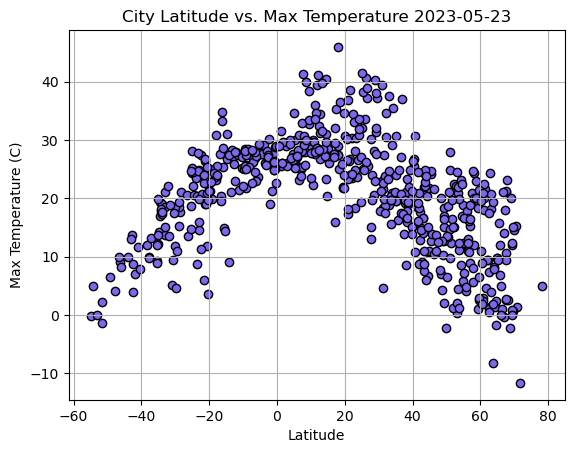

In [42]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature 2023-05-23")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

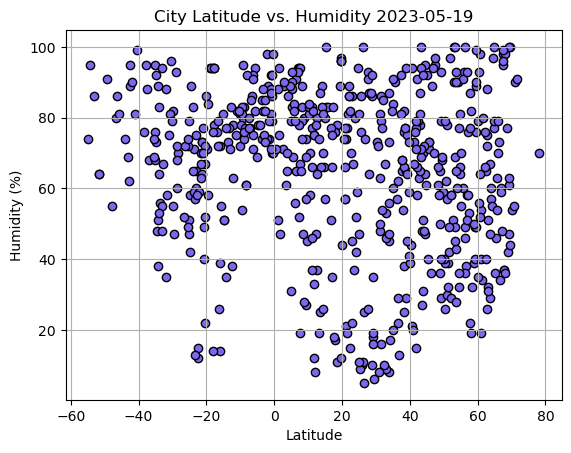

In [43]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

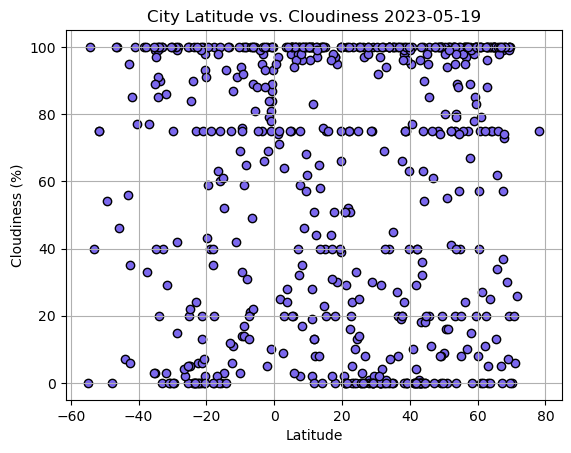

In [44]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

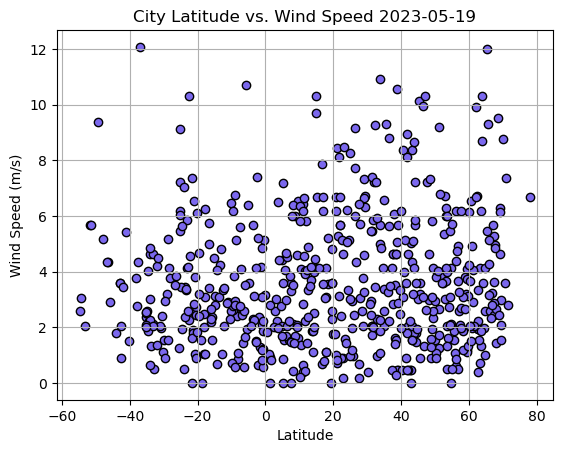

In [45]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

# Define model
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create regression line and add to plot
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

# Calculate and plot Pearson's r value
    print(f"The r-value is: {rvalue}")
    
# Remaining graphical elements for all plots
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
    return line_eq, rvalue

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,metlili chaamba,32.2667,3.6333,30.52,9,0,9.26,DZ,1684760632
3,bethel,41.3712,-73.4140,18.56,73,0,0.89,US,1684760582
5,hawaiian paradise park,19.5933,-154.9731,21.69,97,39,2.29,US,1684760633
6,vilyuchinsk,52.9306,158.4028,1.15,90,100,6.71,RU,1684760633
7,grand falls-windsor,48.9332,-55.6649,10.28,65,100,0.89,CA,1684760634


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,13.72,62,95,3.58,AU,1684760631
2,codrington,-38.2667,141.9667,12.00,76,100,3.77,AU,1684760632
4,arraial do cabo,-22.9661,-42.0278,24.92,65,75,4.12,BR,1684760633
8,invercargill,-46.4000,168.3500,9.01,86,100,4.33,NZ,1684760634
9,kerikeri,-35.2268,173.9474,12.17,95,99,2.38,NZ,1684760634


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7366507356526889


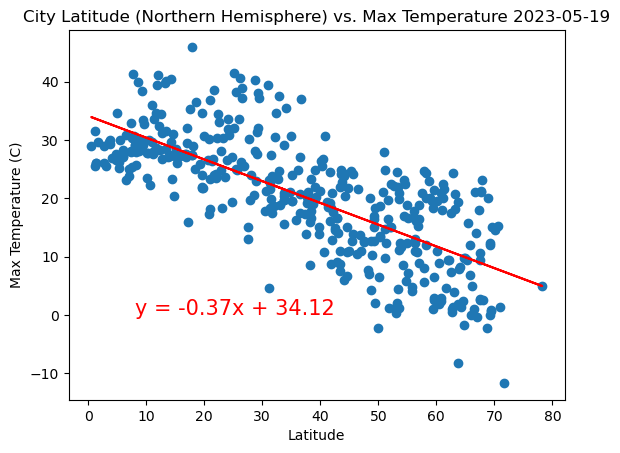

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regEQplotX = 8
regEQplotY = 0

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.7911943537807381


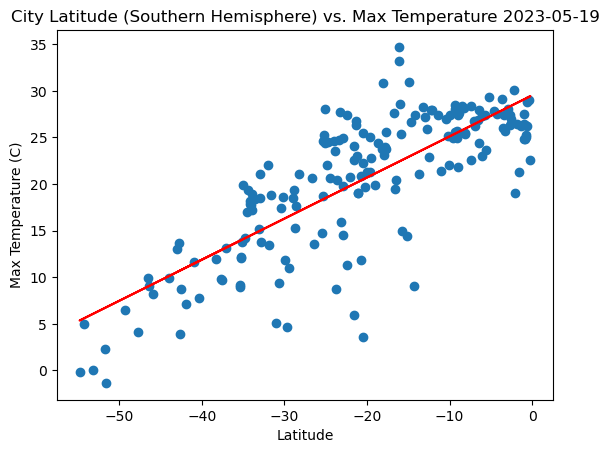

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig6.png")
plt.show()

#### **Discussion about the project and the linear relationship:** 

It should be stated at the outset that the generalizability of the findings across all plots is limited because the plots represent a single day, 5/19/2023. Since the weather fluctuates in any locale, this day may exhibit atypical meteorological patterns in many places and thus not convey more enduring weather features. Analyzing data over time would address this small-n problem. I have endeavored to partly approximate this approach by running the code several times over four days: the hemispheric relationships between latitude and temperature remain noticeable and enduring, while lines of best fit for latitude vs. the other weather variables often differ in direction and r score, though each holding at a low absolute value. This meshes with my ultimate conclusion: *there is a reliable correlation only between latitude and temperature.*

Relying on the citipy dataset may overrepresent regions that have more major cities and correspondingly underrepresents those with fewer large cities or fewer cities in general. When "eyeballed", it appears that the datapoint positions blanket the entire earth, but there could be an urban bias buried in the data that may be partially mitigated by weighting regions by the number and size of their cities.

As for the latitude vs. temperature plots (in Celsius, converted from Kelvin): There is a noticeable downward slope of the regression line for the northern hemisphere and an upward slope for the southern hemisphere, displaying a negative relationship between latitude and temperature for the former and a positive relationship for the latter. R values are extreme (-0.74 for the northern hemisphere, 0.79 for the southern hemisphere), showing that these relationships hold for the majority of the data. As mentioned in the introduction to this assignment, this makes sense because higher latitudes in the northern hemisphere are closer to the North Pole, where it is cold, while higher latitudes in the southern hemisphere are closer to the equator, where it tends to be warm.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.04938476789400943


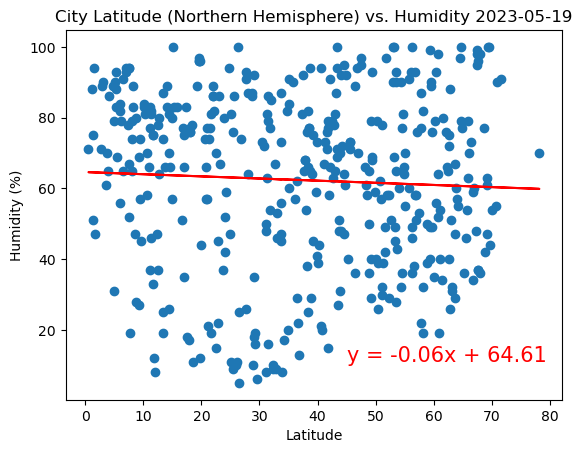

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 11

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Northern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig7.png")

# Show the plot
plt.show()

The r-value is: 0.10104620274646327


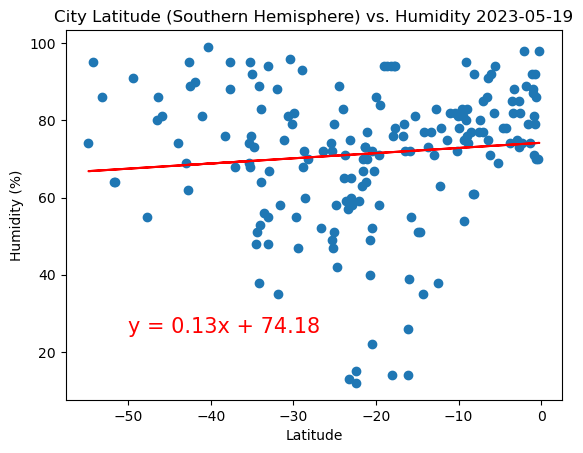

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regEQplotX = -50
regEQplotY = 25

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:**

The line of best fit for latitude vs. percent humidity for the northern hemisphere has a slightly negative slope, while the slope is slightly positive for the southern hemisphere; the fact that the r scores are at the absolute values of 0.10 or less displays wide dispersion of the datapoints. On balance, there is no reliable relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.039190221088433556


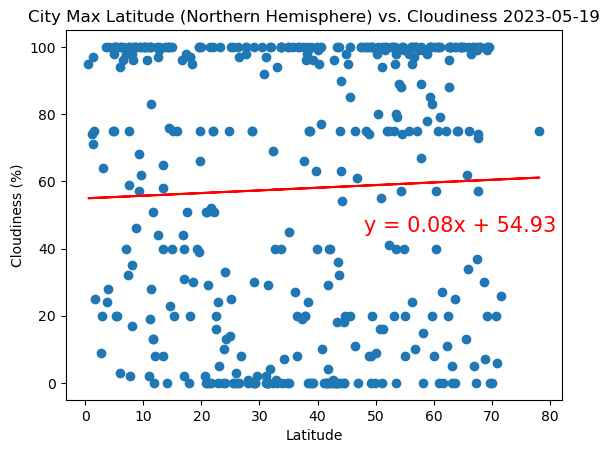

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regEQplotX = 48
regEQplotY = 45

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: 0.11570932574967396


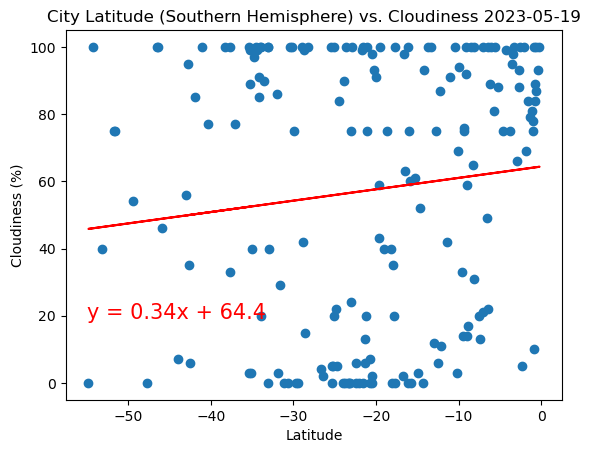

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regEQplotX = -55
regEQplotY = 19

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

# **Discussion about the linear relationship:** 

The regression line for latitude vs. cloudiness, the latter expressed as a percentage, slopes very slightly upward for the both hemispheres, but with low absolute r values (i.e., only 0.04 for the nothern hemisphere and 0.12 for the southern hemisphere). This makes sense given the noticeably widely different values of the datapoints shown in the plots. Hence, there is little or no relationship between the variables. A future study might look at the relationship between humidity and cloudiness, given that clouds are composed of water vapor and both variables seem to be unaffected by an increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07544904599087572


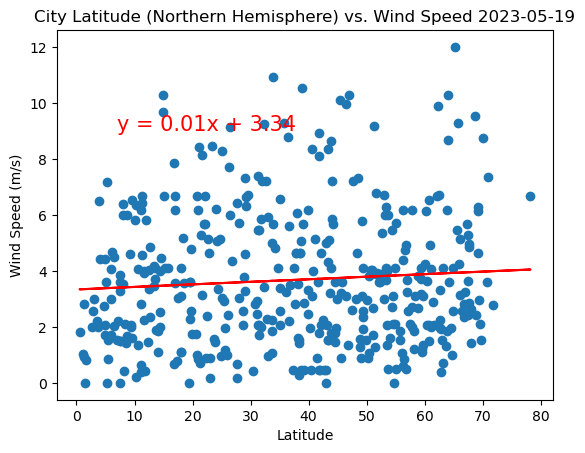

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regEQplotX = 7
regEQplotY = 9

# Label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: -0.10031625862651657


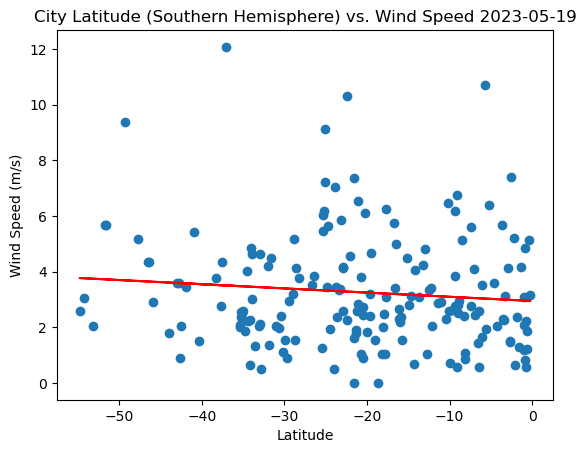

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig10.png")

# Show the plot
plt.show()

**Discussion about the linear relationship amd the conclusion:** 

As with cloudiness, wind speed (in m/s) almost holds relatively steady with increasing latitude in the northern hemisphere, with a barely positive line of best fit and a low (0.08) r score, while the southern hemisphere displays a mildly negative relationship with an absolutely higher, though still modest, Pearson's r of -0.10. With such such low absolute values, we cannot be sure the correlations aren't just the result of random fluctuations.

*On balance and as aforementioned, temperature is strongly correlated with changes in latitude and each hemisphere has its distinct pattern in this regard. The other variables in this study are practically unrelated to an increase in latitude.*